In [1]:
#  Name: Mahmoud Alabsi
#  Task: 1st-Prediction using Supervised ML 

#Import libraries and data set

In [2]:
# import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# import Data set
data = pd.read_csv('/content/sample_data/Data.csv')

#EDA (Exploratory Data Analysis)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Some plots**

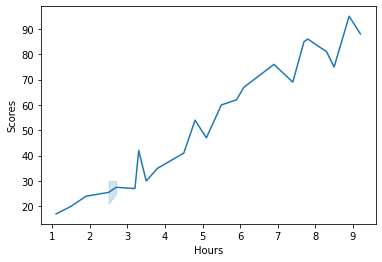

In [7]:
sns.lineplot(x=data['Hours'] , y=data['Scores'])
# linear correlation between the two attributes

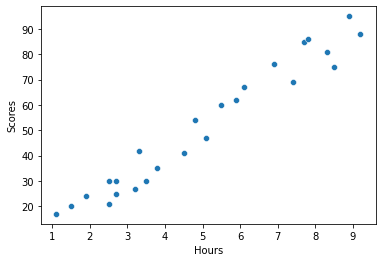

In [8]:
sns.scatterplot(x=data['Hours'] , y=data['Scores'])

**Split data set (train, test)**

In [9]:
predictors = data['Hours'].copy()
labels = data['Scores'].copy() 

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(predictors, labels, test_size=0.2, random_state=42) 

In [11]:
# convert predictors array from 1D to 2D
def conv1D_2D (x):
  x = np.array(x).reshape(-1,1)
  return x

In [12]:
x_train = conv1D_2D(x_train)
x_train.shape

(20, 1)

#Train model

In [13]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(x_train , y_train)

LinearRegression()

**calculate RMSE**

In [14]:
from sklearn.metrics import mean_squared_error

y_predict = lnr.predict(x_train)
error = mean_squared_error(y_train, y_predict, squared=False)
error

5.608461065868858

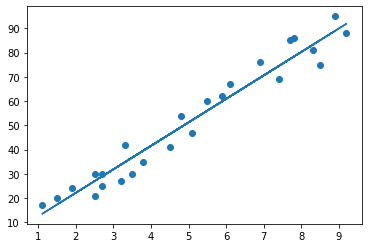

In [15]:
# plot linear regression model fit line 
q = lnr.intercept_ + lnr.coef_*predictors
plt.scatter(predictors, labels)
plt.plot(predictors, q);
plt.show()

# Test model

In [16]:
x_test = conv1D_2D(x_test)

In [17]:
y_test_predict = lnr.predict(x_test)

In [18]:
test_error = mean_squared_error(y_test, y_test_predict, squared=False)
test_error

4.352380006653288

In [19]:
print('test predictions: ' , y_test_predict.round(2))
print('test labels:      ' , np.array(y_test))

test predictions:  [83.19 27.03 27.03 69.63 59.95]
test labels:       [81 30 21 76 62]


**Predict (9.25 Hr)**

In [20]:
lnr.predict([[9.25]])

array([92.38611528])